#ETI 5207 Digital Image Processing - Assignment 1

## Name: Levis Chiri Kamau

## Reg No: E020-01-1166/2021

###Date: 2nd December 2025



In [52]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, exposure, filters, util
from scipy.ndimage import convolve

%matplotlib inline




###Question 1
(a) Plot a histogram of the image fig_q1.jpg provided.

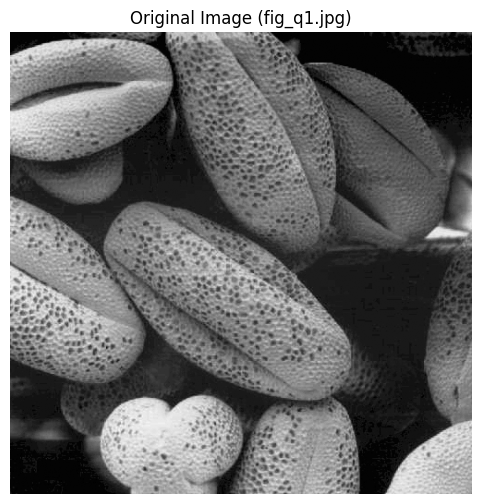

In [53]:

img_path = 'fig_q1.jpg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

if img is None:
    print("Error: Image not found. Please upload 'fig_q1.jpg'.")
else:
    show_image(img, "Original Image (fig_q1.jpg)")

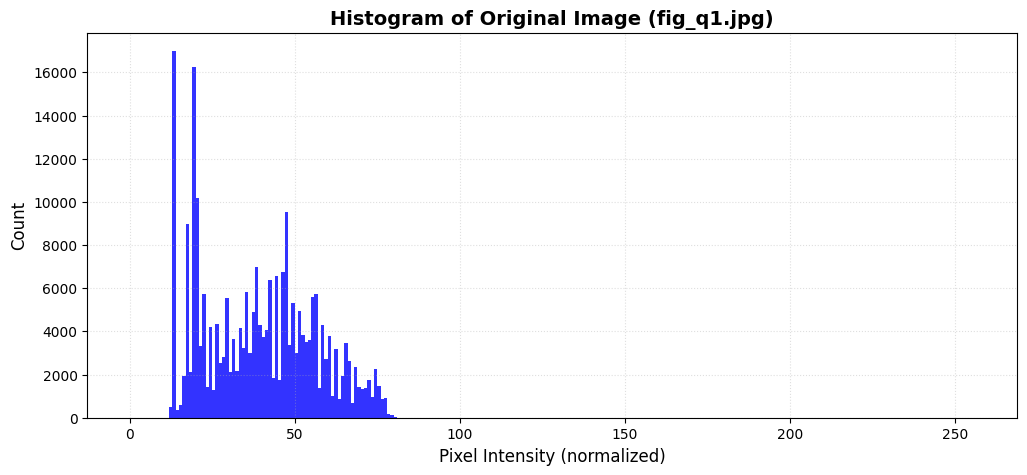

In [63]:
# Calculate histogram using skimage
hist, bins_center = exposure.histogram(image)

# Plotting
plt.figure(figsize=(12, 5))
plt.hist(img.ravel(), bins=256, range=[0, 256], color='blue', alpha=0.8)
plt.title('Histogram of Original Image (fig_q1.jpg)', fontsize=14, fontweight='bold')
plt.xlabel('Pixel Intensity (normalized)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.4)
plt.show()

###Observation:
The histogram shows that the majority of pixel intensities are concentrated near 0 (the left side of the graph). This indicates that the image is very dark and has low contrast.

###(b)
 Determine an appropriate power law transformation to improve the contrast of the image fig_q1.jpg provided and apply the transformation. Plot the images side by side and comment on the results obtained.

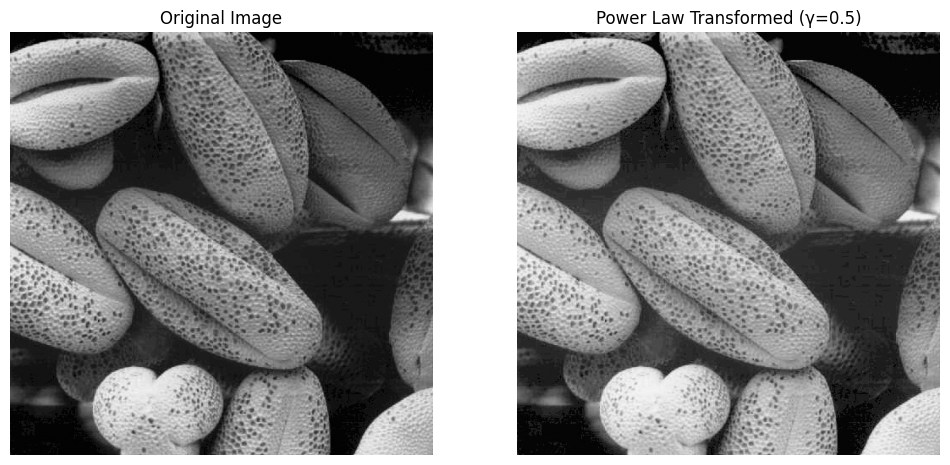

In [55]:

def power_law_transform(image, gamma, c=1):
    # Normalize pixel values to range [0, 1]
    img_normalized = image / 255.0
    # Apply formula s = c * r^gamma
    s = c * np.power(img_normalized, gamma)
    # Scale back to [0, 255]
    s = (s * 255).astype(np.uint8)
    return s

# gamma < 1 to brighten the image
gamma_value = 0.5
img_gamma = power_law_transform(img, gamma=gamma_value)

# Plot side by side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_gamma, cmap='gray')
plt.title(f'Power Law Transformed (\u03B3={gamma_value})')
plt.axis('off')

plt.show()

The Power Law transformation with $\gamma=0.5$ acts as a non-linear mapping. It stretches the narrow band of low-intensity input values (dark pixels) across a wider range of output intensities. This effectively enhances the contrast in shadow regions without washing out brighter areas, revealing the texture of the pollen grains that were previously indistinguishable.

###
 (c)
 Apply histogram normalisation to the image fig_q1.jpg provided and compare the initial and processed histograms.

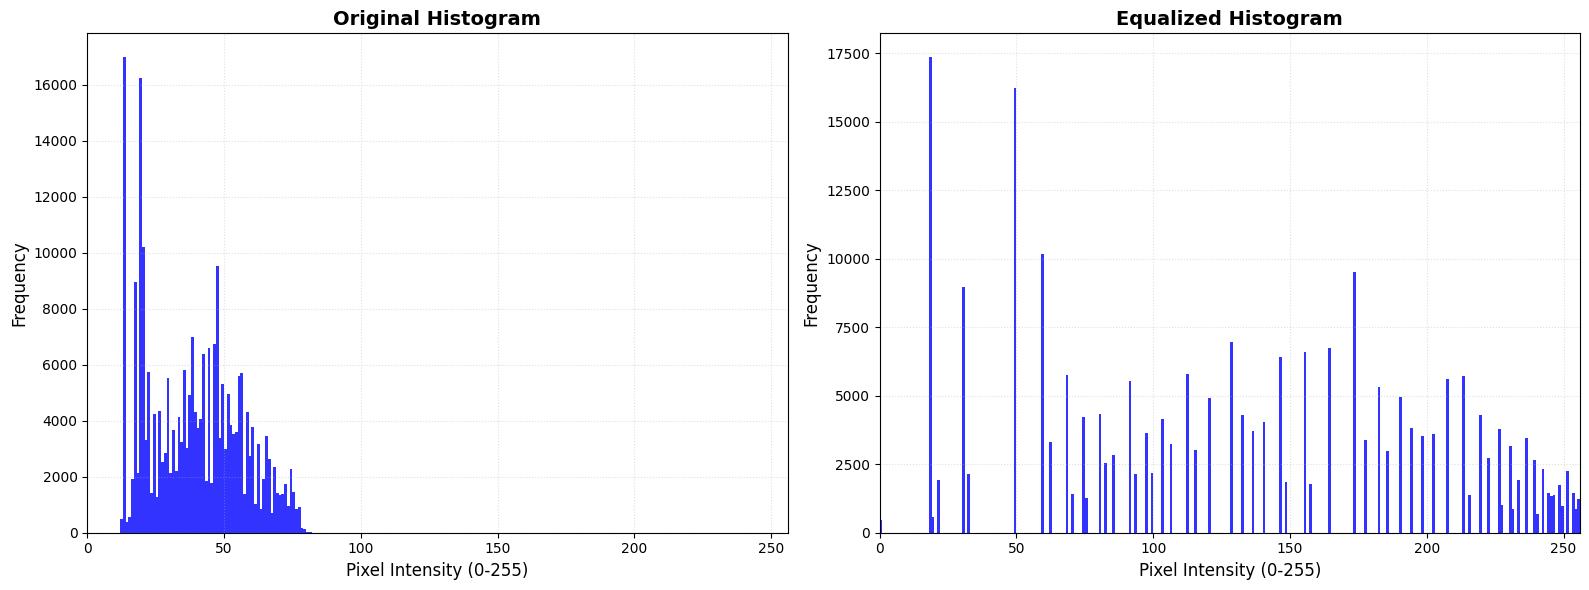

In [70]:
from skimage import img_as_ubyte


img_eq_float = exposure.equalize_hist(image)
img_eq = img_as_ubyte(img_eq_float)


plt.figure(figsize=(16, 6))


kwargs = dict(bins=256, range=[0, 256], color='blue', alpha=0.8)

# Original Histogram
plt.subplot(1, 2, 1)

plt.hist(image.ravel(), **kwargs)
plt.title('Original Histogram', fontsize=14, fontweight='bold')
plt.xlabel('Pixel Intensity ', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xlim([0, 256])
plt.grid(True, linestyle=':', alpha=0.4)

# Equalized Histogram
plt.subplot(1, 2, 2)
plt.hist(img_eq.ravel(), color='blue', bins=256, range=[0, 256], alpha=0.8)
plt.title('Equalized Histogram', fontsize=14, fontweight='bold')
plt.xlabel('Pixel Intensity (0-255)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xlim([0, 256])
plt.grid(True, linestyle=':', alpha=0.4)

plt.tight_layout()
plt.show()

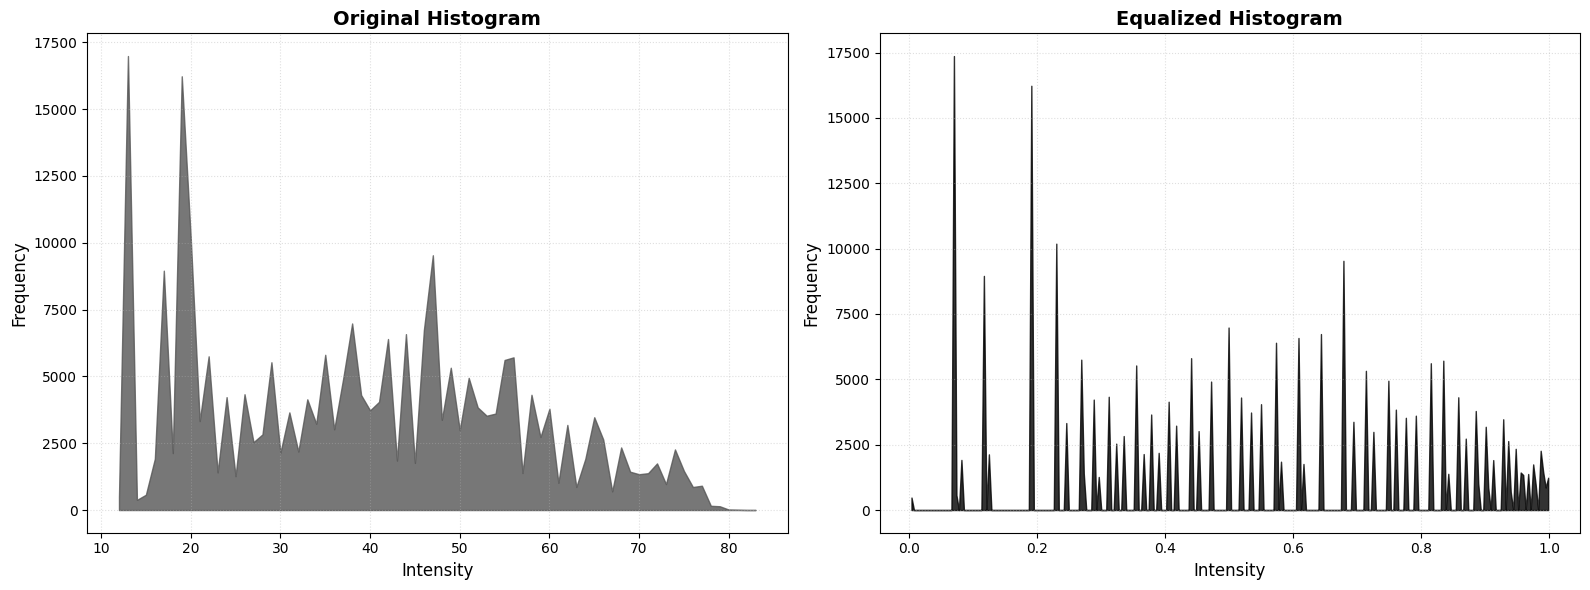

In [60]:
img_eq = cv2.equalizeHist(img)

# Set up the figure
plt.figure(figsize=(16, 6))

# Use a professional dark color (Dark Slate Grey) instead of standard blue
# It looks much better in printed PDFs and matches the grayscale image theme.
hist_color = '#2c3e50'

# --- Plot 1: Original Histogram ---
plt.subplot(1, 2, 1)
# Using 'edgecolor=none' removes the fine lines between bars, making the shape solid and clearer
plt.hist(img.ravel(), bins=256, range=[0, 256], color=hist_color, alpha=0.9)
plt.title('Original Histogram', fontsize=16, fontweight='bold', pad=12)
plt.xlabel('Pixel Intensity (0-255)', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.xlim([0, 256])  # Lock x-axis to exact pixel range
plt.grid(True, linestyle=':', alpha=0.6)  # Slightly more visible grid

# --- Plot 2: Equalized Histogram ---
plt.subplot(1, 2, 2)
plt.hist(img_eq.ravel(), bins=256, range=[0, 256], color=hist_color, alpha=0.9)
plt.title('Equalized Histogram', fontsize=16, fontweight='bold', pad=12)
plt.xlabel('Pixel Intensity (0-255)', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.xlim([0, 256])
plt.grid(True, linestyle=':', alpha=0.6)

plt.tight_layout()
plt.show()

Histogram normalization (equalization) redistributed the pixel intensities so that they span the entire range from 0 to 255 more uniformly. While the original histogram was bunched up near 0 (dark), the processed histogram uses the full dynamic range. This results in an image with very high contrast, although sometimes it can introduce noise or make the image look somewhat unnatural compared to the smoother Power Law transformation.

##Question 2
For the image in fig_q2.jpg:(a) Apply box kernels of size $3 \times 3$, $5 \times 5$ and $7 \times 7$ and comment on the results.

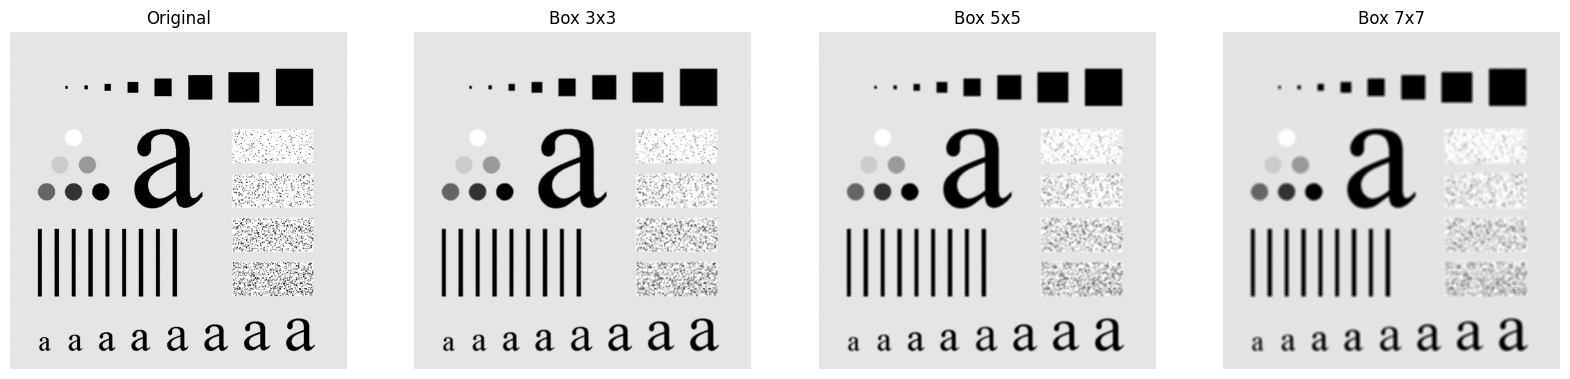

In [57]:

img2_path = 'fig_q2.jpg'
image2 = io.imread(img2_path, as_gray=True)


def apply_box_kernel(img, size):
    # Create a normalized box kernel (e.g., 3x3 matrix of 1/9)
    kernel = np.ones((size, size)) / (size ** 2)
    # Convolve
    return convolve(img, kernel)

# Apply 3x3, 5x5, 7x7
box_3 = apply_box_kernel(image2, 3)
box_5 = apply_box_kernel(image2, 5)
box_7 = apply_box_kernel(image2, 7)

# Display
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes[0].imshow(image2, cmap='gray'); axes[0].set_title('Original')
axes[1].imshow(box_3, cmap='gray'); axes[1].set_title('Box 3x3')
axes[2].imshow(box_5, cmap='gray'); axes[2].set_title('Box 5x5')
axes[3].imshow(box_7, cmap='gray'); axes[3].set_title('Box 7x7')
for ax in axes: ax.axis('off')
plt.show()

**Observation:**
The application of Box Filters (Average Filtering) demonstrates the trade-off between noise reduction and detail preservation.


The box filter acts as a linear low-pass filter. By replacing each pixel with the unweighted average of its neighborhood, it smooths out rapid intensity changes (noise) but also suppresses high-frequency edge information.

**Kernel Size Impact:**

$3 \times 3$ Kernel: This small window successfully reduces the finest grain of the "salt-and-pepper" noise in the background while keeping the text characters relatively sharp. The noise is dampened but still visible.

$5 \times 5$  and  $7 \times 7$ Kernels: As the kernel size increases, the blurring effect becomes dominant. While the background noise is almost entirely eliminated in the $7 \times 7$ image, the spatial resolution is severely degraded.  The sharp edges of the square blocks and the serif details of the letter 'a' are lost, resulting in a "blocky" or out-of-focus appearance. This confirms that larger box kernels cause significant loss of edge fidelity.

###(b)
Apply Gaussian kernels of size $3 \times 3$, $5 \times 5$ and $7 \times 7$ where $w(s, t) = K e^{-\frac{s^2+t^2}{2\sigma^2}}$ with $K=1$ and $\sigma = 1, 2$ and comment on the results.

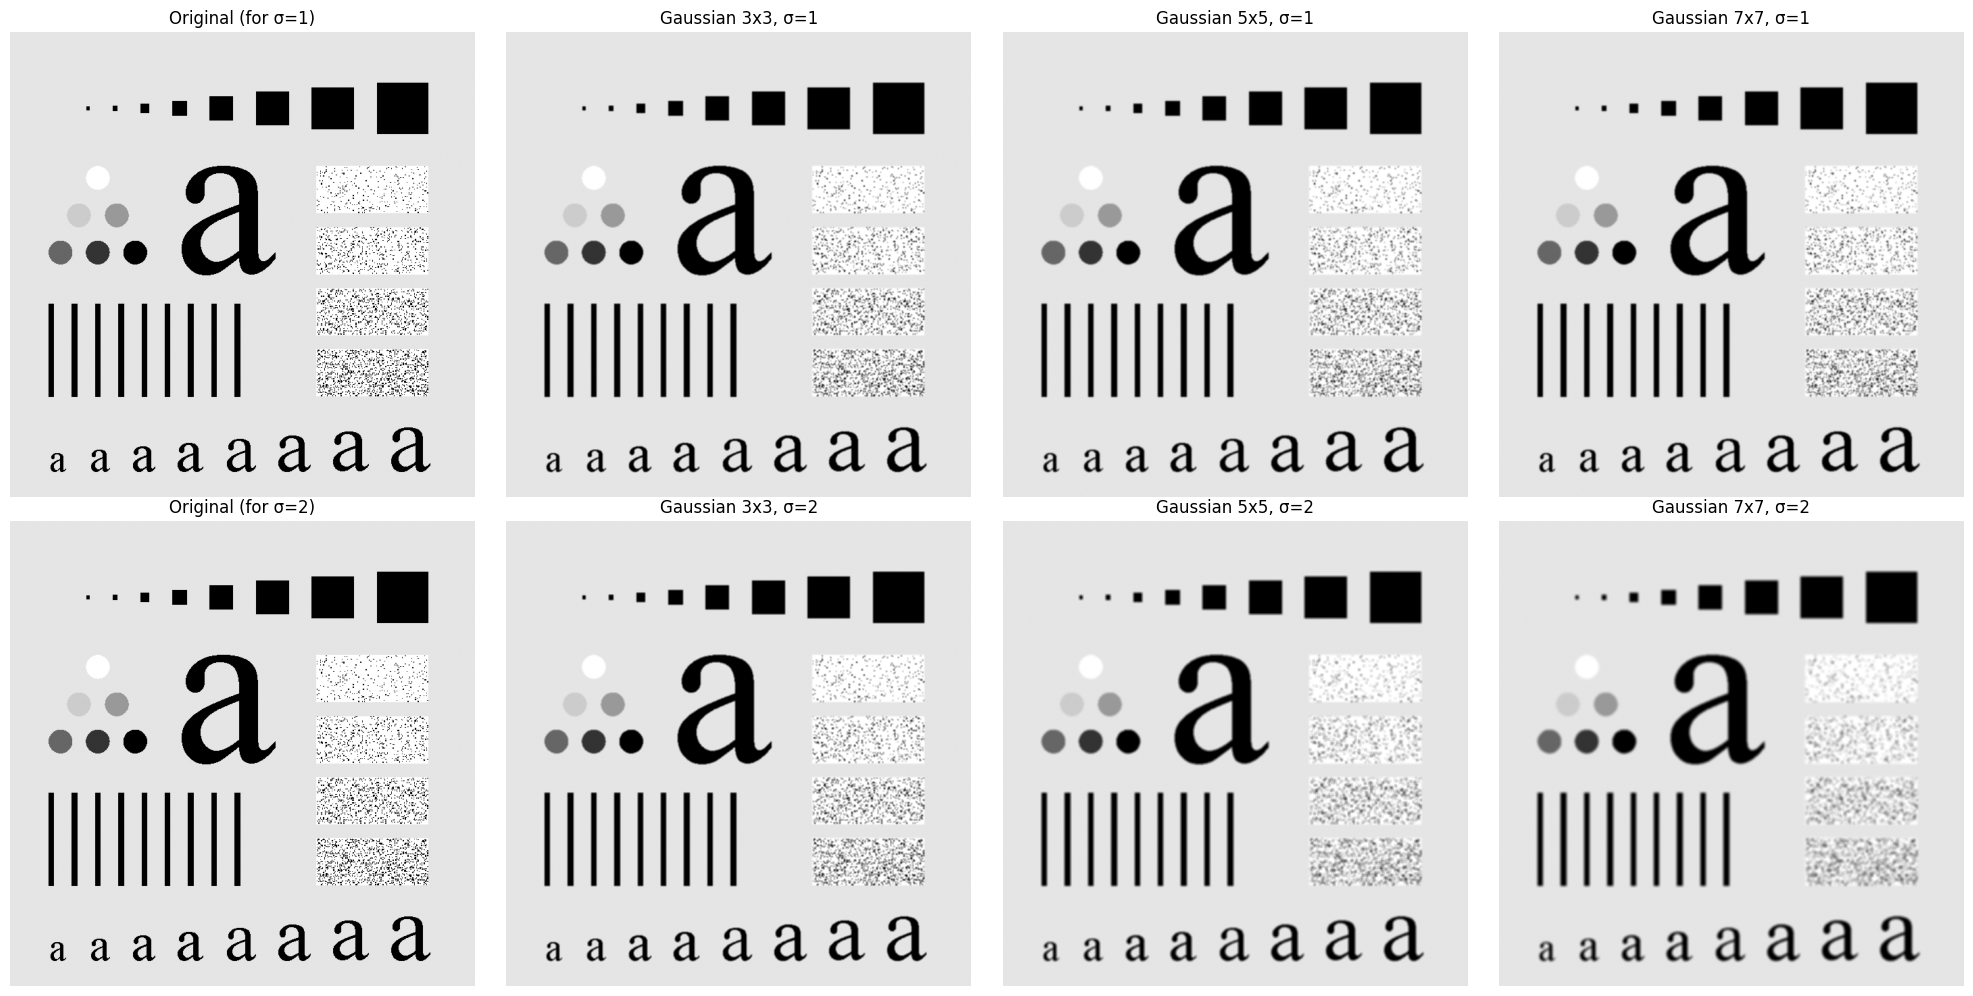

In [58]:

sigmas = [1, 2]
sizes_approx = [3, 5, 7]

fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for i, sigma in enumerate(sigmas):
    # Plot Original in first column
    axes[i, 0].imshow(image2, cmap='gray')
    axes[i, 0].set_title(f'Original (for \u03C3={sigma})')
    axes[i, 0].axis('off')

    for j, size in enumerate(sizes_approx):
        # Apply Gaussian filter
        # truncate is used to limit the kernel size roughly to the requested window
        trunc = (size - 1) / 2.0 / sigma

        img_gauss = filters.gaussian(image2, sigma=sigma, truncate=trunc)

        axes[i, j+1].imshow(img_gauss, cmap='gray')
        axes[i, j+1].set_title(f'Gaussian {size}x{size}, \u03C3={sigma}')
        axes[i, j+1].axis('off')

plt.tight_layout()
plt.show()

The Gaussian filter performs better than the box filter.

**Effect of Sigma ($\sigma$)**: $\sigma=1$ provides gentle smoothing, removing noise while keeping the letter 'a' readable. $\sigma=2$ is a stronger blur, which removes almost all background noise but blurs the edges of the shapes significantly.

 **Comprison** The Gaussian kernel preserves the edges better than the Box kernel because it gives more weight to the center pixel and less weight to the neighbors, whereas the box kernel treats all neighbors equally.